# Result_experimentKW26_baseline

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path, PurePath
import os
import numbers
from scipy.stats.mstats import gmean

pd.options.display.max_columns = 250 #Changes the number of columns diplayed (default is 20)
pd.options.display.max_rows = 600 #Changes the number of rows diplayed (default is 60)

## Experiment Summary

Change the following variable to the `score.csv` with the result of the experiment:

In [2]:
experimentCSVPath = PurePath("CDTDRI0.2GD0.8NDTDII5DP5BD170BDF1.05S1.5RS10", 'scores_experiment_baseline.csv')

In [3]:
minimumScoreForMeasurement = 5

Loading of results:

In [4]:
experiment = pd.read_csv(experimentCSVPath)

In [5]:
experiment

,DateTime,PlayerName,EpisodeId,Duration,Drag,AverageDistanceToCenter,Supervisor,ModelName,ResetPlatformToIdentity,FocusActivePlatform,Autonomous,AgentChoice,Aborted
0,10.12.2023 22:10:20,player1,5,103.734604,2.750002e-01,2.584964,False,NoSupervisor,True,False,False,Ball3DAgentOptimal,False
1,10.12.2023 22:10:20,player1,6,124.771072,1.500002e-01,2.377253,False,NoSupervisor,True,False,False,Ball3DAgentOptimal,False
2,11.12.2023 10:33:49,player0,1,3.899997,7.750000e-01,4.130031,False,NoSupervisor,True,False,False,Ball3DAgentOptimal,False
3,11.12.2023 10:33:49,player0,2,228.692032,-3.499998e-01,2.401449,False,NoSupervisor,True,False,False,Ball3DAgentOptimal,False
4,11.12.2023 10:33:49,player0,3,199.445786,-1.999998e-01,2.496257,False,NoSupervisor,True,False,False,Ball3DAgentOptimal,False
5,11.12.2023 11:00:49,player2,1,63.561264,4.750003e-01,2.903962,False,NoSupervisor,True,False,False,Ball3DAgentOptimal,False
6,11.12.2023 11:00:49,player2,2,95.036064,3.000003e-01,2.494948,False,NoSupervisor,True,False,False,Ball3DAgentOptimal,False
7,11.12.2023 11:25:58,player3,1,2.519998,7.750000e-01,4.480531,False,NoSupervisor,True,False,False,Ball3DAgentOptimal,False
8,11.12.2023 11:25:58,player3,2,7.639994,7.500001e-01,3.939605,False,NoSupervisor,True,False,False,Ball3DAgentOptimal,False
9,11.12.2023 11:25:58,player3,3,26.980427,6.500002e-01,3.040788,False,NoSupervisor,True,False,False,Ball3DAgentOptimal,False


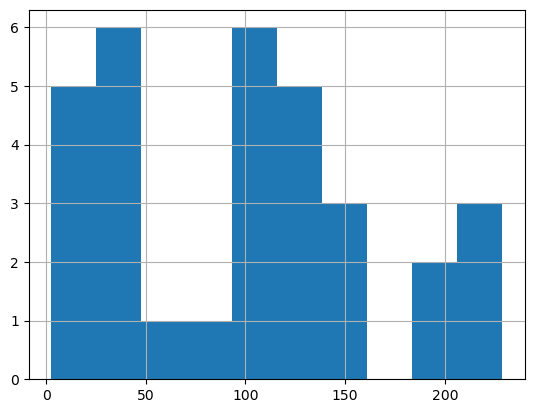

In [6]:
experiment['Duration'].hist()
plt.show()

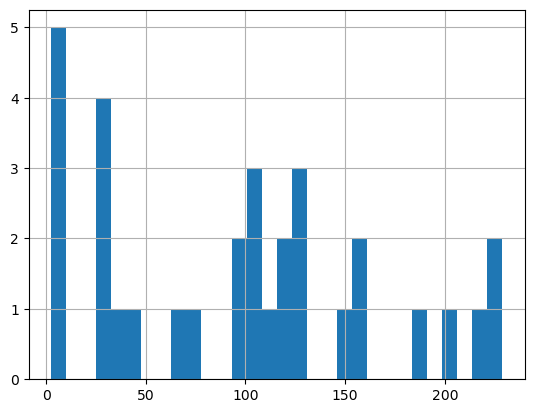

In [7]:
experiment['Duration'].hist(bins=30)
plt.show()

## Results

In [8]:
experiment = experiment[experiment['Aborted'] == False]
experiment = experiment[experiment['Duration'] >= minimumScoreForMeasurement]
#experiment = experiment.replace("AUIAUI1S5MunifiedD1_ev1_session19_AOD23_DRI0.2NTTT", "AUIAUI1S5MunifiedD1_ev1_session19_AOD1_DRI0.2NTTT")

In [9]:
experimentDict = {}

experimentDict['Total'] = experiment

for name in experiment['PlayerName']:
    experimentDict[name] = experiment[experiment['PlayerName'] == name]

In [10]:
experiment

,DateTime,PlayerName,EpisodeId,Duration,Drag,AverageDistanceToCenter,Supervisor,ModelName,ResetPlatformToIdentity,FocusActivePlatform,Autonomous,AgentChoice,Aborted
0,10.12.2023 22:10:20,player1,5,103.734604,2.750002e-01,2.584964,False,NoSupervisor,True,False,False,Ball3DAgentOptimal,False
1,10.12.2023 22:10:20,player1,6,124.771072,1.500002e-01,2.377253,False,NoSupervisor,True,False,False,Ball3DAgentOptimal,False
3,11.12.2023 10:33:49,player0,2,228.692032,-3.499998e-01,2.401449,False,NoSupervisor,True,False,False,Ball3DAgentOptimal,False
4,11.12.2023 10:33:49,player0,3,199.445786,-1.999998e-01,2.496257,False,NoSupervisor,True,False,False,Ball3DAgentOptimal,False
5,11.12.2023 11:00:49,player2,1,63.561264,4.750003e-01,2.903962,False,NoSupervisor,True,False,False,Ball3DAgentOptimal,False
6,11.12.2023 11:00:49,player2,2,95.036064,3.000003e-01,2.494948,False,NoSupervisor,True,False,False,Ball3DAgentOptimal,False
8,11.12.2023 11:25:58,player3,2,7.639994,7.500001e-01,3.939605,False,NoSupervisor,True,False,False,Ball3DAgentOptimal,False
9,11.12.2023 11:25:58,player3,3,26.980427,6.500002e-01,3.040788,False,NoSupervisor,True,False,False,Ball3DAgentOptimal,False
10,11.12.2023 11:25:58,player3,4,153.896057,2.500021e-02,2.543825,False,NoSupervisor,True,False,False,Ball3DAgentOptimal,False
12,11.12.2023 12:12:33,player4,2,47.480896,5.500002e-01,2.679267,False,NoSupervisor,True,False,False,Ball3DAgentOptimal,False


Dividing into different models:

In [11]:
def getResults(experimentDict, dateTimeExpression='(value[\'DateTime\'] > \'10.11.2023\')', normalize=False, meanFunc=np.mean):
    resultDict = {}
    columns = ['Duration', 'AverageDistanceToCenter']

    for column in columns:
        for key, value in experimentDict.items():
            dfs = {}

            if key not in resultDict:
                resultDict[key] = {}

            for modelName in value['ModelName'].unique():
                df = value[eval(dateTimeExpression)]
                df = df[df['ModelName'] == modelName][[column, 'PlayerName']].set_index('PlayerName')#.reset_index(drop=True)

                modelName = modelName.replace("AUI1", "")
                modelName = modelName.replace("AUI", "")
                modelName = modelName.replace("solo", "")
                dfs[modelName] = df

            resultDict[key][column] = pd.concat(dfs, axis=1, sort=False)
            resultDict[key][column] = resultDict[key][column].rename(columns={"NoSupervisor": "Baseline"})  
            resultDict[key][column] = resultDict[key][column].droplevel(1, axis=1)

            if normalize and key == 'Total':
                resultDict[key][column] = resultDict[key][column].groupby('PlayerName', group_keys=False).apply(lambda x: x/x.max().max()).groupby('PlayerName').agg(meanFunc)
            elif key == 'Total':
                resultDict[key][column] = resultDict[key][column].groupby('PlayerName').agg(meanFunc)
                
    return resultDict

In [12]:
resultDict = getResults(experimentDict)

In [13]:
resultDict['Total']['AverageDistanceToCenter']

,Baseline
PlayerName,
player0,2.448853
player1,2.481108
player10,2.877049
player11,2.187495
player12,2.510196
player2,2.699455
player3,3.174739
player4,2.615484
player5,2.596883


In [14]:
resultDict['Total']['Duration'].shape

(13, 1)

In [15]:
resultDict['Total']['Duration']

,Baseline
PlayerName,
player0,214.068909
player1,114.252838
player10,79.285629
player11,168.010307
player12,68.707272
player2,79.298664
player3,62.838826
player4,103.409058
player5,67.098252


In [16]:
resultDict['Total']['Duration'].describe()

,Baseline
count,13.000000
mean,111.195263
std,51.622183
min,52.550188
25%,68.707272
50%,103.409058
75%,143.241737
max,214.068909


In [17]:
resultDict['Total']['Duration'].mean()

Baseline    111.195263
dtype: float64

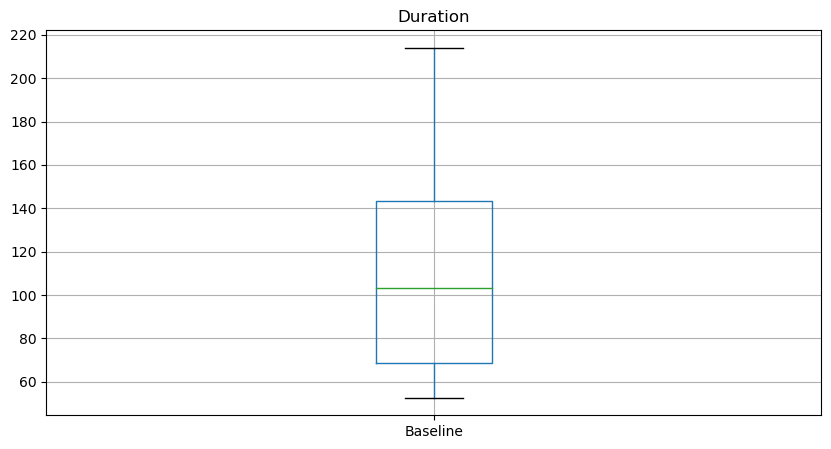

In [18]:
resultDict['Total']['Duration'].boxplot(figsize=(10,5))
plt.title('Duration')
plt.show()

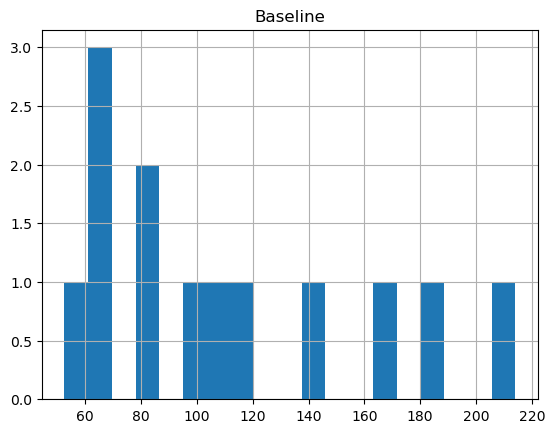

In [19]:
resultDict['Total']['Duration'].hist(bins=19)
plt.show()

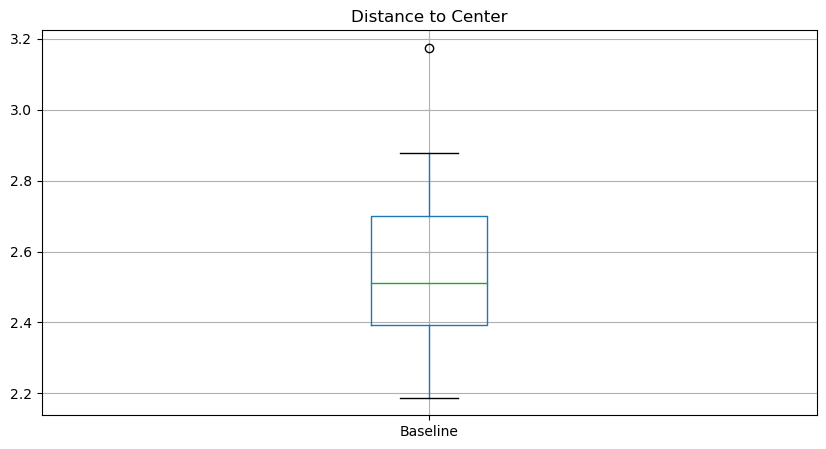

In [20]:
resultDict['Total']['AverageDistanceToCenter'].boxplot(figsize=(10,5))
plt.title('Distance to Center')
plt.show()

# Geometric Mean

In [21]:
resultDictGmean = getResults(experimentDict, meanFunc=gmean)

In [22]:
resultDictGmean['Total']['AverageDistanceToCenter']

,Baseline
PlayerName,
player0,2.448395
player1,2.478934
player10,2.876860
player11,2.185958
player12,2.509588
player2,2.691697
player3,3.123504
player4,2.614706
player5,2.595934


In [23]:
resultDictGmean['Total']['Duration']

,Baseline
PlayerName,
player0,213.568870
player1,113.767648
player10,61.625345
player11,161.459137
player12,56.983727
player2,77.721376
player3,31.656029
player4,86.979733
player5,60.344692


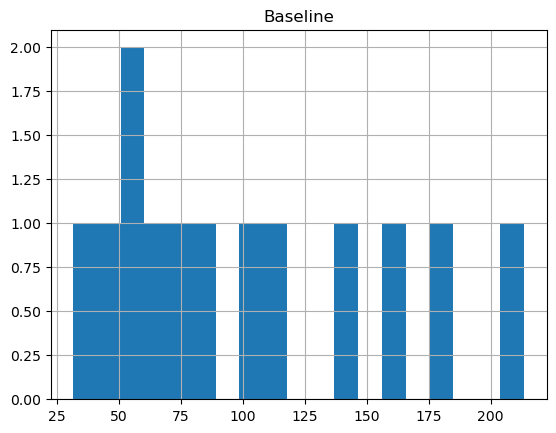

In [24]:
resultDictGmean['Total']['Duration'].hist(bins=19)
plt.show()

In [25]:
resultDictGmean['Total']['Duration'].describe()

,Baseline
count,13.000000
mean,103.240923
std,56.253316
min,31.656029
25%,60.344692
50%,86.979733
75%,140.544100
max,213.568870


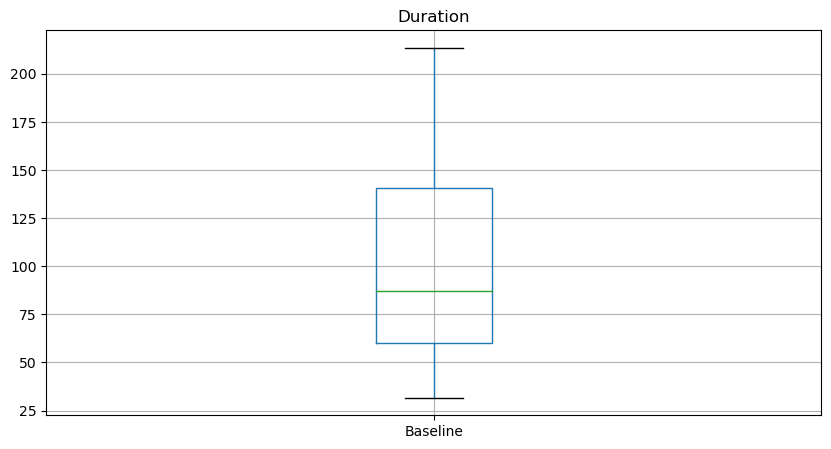

In [26]:
resultDictGmean['Total']['Duration'].boxplot(figsize=(10,5))
plt.title('Duration')
plt.show()

In [27]:
resultDictGmean['Total']['Duration'].describe()

,Baseline
count,13.000000
mean,103.240923
std,56.253316
min,31.656029
25%,60.344692
50%,86.979733
75%,140.544100
max,213.568870


## Normalized

In [28]:
resultDictNorm = getResults(experimentDict, '~((value[\'DateTime\'] > \'27.06.2023\') & (value[\'DateTime\'] < \'28.06.2023\'))', True, meanFunc=gmean)

In [29]:
resultDictNorm['Total']['Duration']

,Baseline
PlayerName,
player0,0.933871
player1,0.911811
player10,0.477084
player11,0.752832
player12,0.532091
player2,0.817809
player3,0.205697
player4,0.545885
player5,0.625750


In [30]:
resultDictNorm['Total']['Duration']

,Baseline
PlayerName,
player0,0.933871
player1,0.911811
player10,0.477084
player11,0.752832
player12,0.532091
player2,0.817809
player3,0.205697
player4,0.545885
player5,0.625750


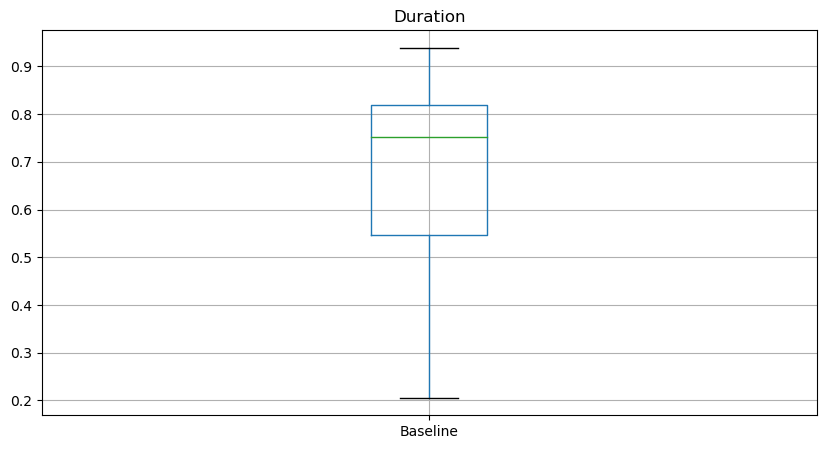

In [31]:
resultDictNorm['Total']['Duration'].boxplot(figsize=(10,5))
plt.title('Duration')
plt.show()

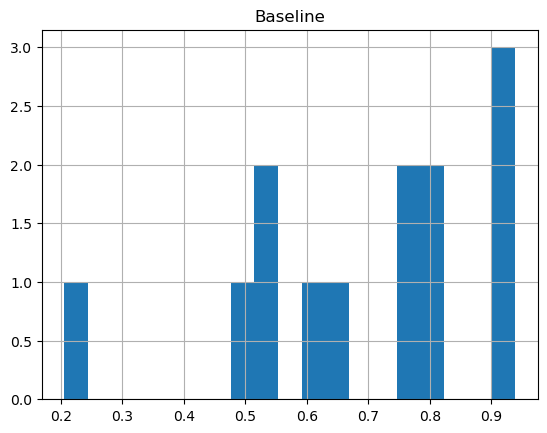

In [32]:
resultDictNorm['Total']['Duration'].hist(bins=19)
plt.show()

In [33]:
#resultDict = getResults(experimentDict, '((value[\'DateTime\'] > \'03.07.2023\') & (value[\'DateTime\'] < \'04.06.2023\'))')

In [34]:
#resultDict['Total']['Duration'].describe()